In [108]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [109]:
# from google.colab import drive
# drive.mount("/content/gdrive/")

In [110]:
# dataframe = pd.read_csv('/content/gdrive/MyDrive/train.csv')
dataframe = pd.read_csv('./train.csv')

dataframe.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [111]:
dataframe.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [112]:
dataframe.shape

(100000, 28)

After observing the above, there are some columns which are not neccessary or hepful in predicting the credit class to which the people belong.We'll be dropping those columns to enrich the data.

In [113]:
dataframe.drop(['ID','Month','SSN','Name'],axis=1,inplace=True)
dataframe.columns

Index(['Customer_ID', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [114]:
dataframe.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [115]:
dataframe.duplicated().sum()

0

Some of the columns may have a '_' which also counts as a null or missing values, let's check that

In [116]:
for col in ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']:
    if dataframe[col][dataframe[col]=='_'].any():
        print(col)

Changed_Credit_Limit


In [117]:
dataframe.loc[dataframe.Changed_Credit_Limit=='_','Changed_Credit_Limit'] = np.nan

In [118]:
numeric_columns = dataframe.select_dtypes(include=['int64','float64']).columns
categorical_columns = dataframe.select_dtypes(include=['object']).columns
print(numeric_columns)
print(categorical_columns)

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')
Index(['Customer_ID', 'Age', 'Occupation', 'Annual_Income', 'Num_of_Loan',
       'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')


From the above we can onserve that some columns have a large number of null values which should be handled.

In [119]:
# null_col = ['Monthly_Inhand_Salary','Type_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Credit_History_Age','Amount_invested_monthly','Monthly_Balance']
# print(null_col)
# from sklearn.impute import SimpleImputer
# impute = SimpleImputer(strategy='mean')

In [120]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      97909 non-null   object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [121]:
for i in dataframe.columns:
    print(f'{i}:{pd.api.types.infer_dtype(dataframe[i])}')

Customer_ID:string
Age:string
Occupation:string
Annual_Income:string
Monthly_Inhand_Salary:floating
Num_Bank_Accounts:integer
Num_Credit_Card:integer
Interest_Rate:integer
Num_of_Loan:string
Type_of_Loan:string
Delay_from_due_date:integer
Num_of_Delayed_Payment:string
Changed_Credit_Limit:string
Num_Credit_Inquiries:floating
Credit_Mix:string
Outstanding_Debt:string
Credit_Utilization_Ratio:floating
Credit_History_Age:string
Payment_of_Min_Amount:string
Total_EMI_per_month:floating
Amount_invested_monthly:string
Payment_Behaviour:string
Monthly_Balance:mixed
Credit_Score:string


We can see that some of the columns are expected to have a neumerical value, but they have string vlaues. So we will handle these values.

In [122]:
wrong = ['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance']
for col in wrong:
    dataframe[col] = dataframe[col].str.replace('_','').astype('float64') # we iterate through all wrong columns and replace the missing floating values
dataframe.dtypes

Customer_ID                  object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

Although Credit_history_age should have been a number , I believe it is okay to keep it as is.
After the above cleaning process, all the columns seem to have a proper data types

In [123]:
dataframe['Customer_ID'].value_counts()

Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64

In [124]:
(dataframe.Customer_ID.value_counts()==8).sum()

12500

In [125]:
dataframe[['Age','Annual_Income','Occupation']]

,Age,Annual_Income,Occupation
0,23.0,19114.12,Scientist
1,23.0,19114.12,Scientist
2,-500.0,19114.12,Scientist
3,23.0,19114.12,Scientist
4,23.0,19114.12,Scientist
...,...,...,...
99995,25.0,39628.99,Mechanic
99996,25.0,39628.99,Mechanic
99997,25.0,39628.99,Mechanic
99998,25.0,39628.99,Mechanic


From the above insight we can observe that there are 8 records for every customer and most of them have the same Age,Occupation and Annual_Income.

In [126]:
dataframe.Age = dataframe.groupby('Customer_ID').Age.transform(lambda x:x.mode()[0])
dataframe.Annual_Income = dataframe.groupby('Customer_ID').Annual_Income.transform(lambda x:x.mode()[0])
dataframe.Occupation = dataframe.groupby('Customer_ID').Occupation.transform(lambda x:x.mode()[0])
dataframe[['Age','Annual_Income','Occupation']]

,Age,Annual_Income,Occupation
0,23.0,19114.12,Scientist
1,23.0,19114.12,Scientist
2,23.0,19114.12,Scientist
3,23.0,19114.12,Scientist
4,23.0,19114.12,Scientist
...,...,...,...
99995,25.0,39628.99,Mechanic
99996,25.0,39628.99,Mechanic
99997,25.0,39628.99,Mechanic
99998,25.0,39628.99,Mechanic


In [127]:
numeric_columns = dataframe.select_dtypes(include=['int64','float64']).columns
categorical_columns = dataframe.select_dtypes(include=['object']).columns
print(numeric_columns)
print(categorical_columns)

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')
Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')


In [128]:
for col in numeric_columns:
    if dataframe[col][dataframe[col]<0].any():
        print(col,len(dataframe[col][dataframe[col]<0]))

Num_Bank_Accounts 21
Num_of_Loan 3876
Delay_from_due_date 591
Num_of_Delayed_Payment 644
Changed_Credit_Limit 1586
Monthly_Balance 9


From the above we observe that, the first 2 columns cannot have negative values, as it makes no sense.

In [129]:
dataframe.Num_Bank_Accounts[dataframe.Num_Bank_Accounts < 0].value_counts()

Num_Bank_Accounts
-1    21
Name: count, dtype: int64

In [130]:
dataframe.drop(dataframe[dataframe.Num_Bank_Accounts<0].index,inplace=True)

In [131]:
dataframe.Num_of_Loan[dataframe.Num_of_Loan < 0].value_counts()

Num_of_Loan
-100.0    3875
Name: count, dtype: int64

In [132]:
dataframe.drop(dataframe[dataframe.Num_of_Loan<0].index,inplace=True)

In [133]:
dataframe.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,96104.000000,96104.000000,81685.000000,96104.000000,96104.000000,96104.000000,96104.000000,96104.000000,89405.000000,94092.000000,94216.000000,96104.000000,96104.000000,96104.000000,91796.000000,9.334300e+04
mean,33.270707,50506.790217,4194.711239,17.096541,22.527606,72.354460,7.164832,21.072650,31.134489,10.394152,27.743090,1427.106101,32.288118,1409.238408,636.061659,-3.213953e+22
std,10.765046,38317.243974,3185.309650,117.309614,129.298964,466.483097,60.321139,14.861229,227.266979,6.795080,192.969963,1155.957167,5.114835,8324.403859,2040.035325,3.272959e+24
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,19337.160000,1625.188333,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.022500,28.060916,30.305498,74.549548,2.698778e+02
50%,33.000000,36993.940000,3091.386667,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.640000,32.307331,69.246684,135.821176,3.364020e+02
75%,42.000000,71681.400000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.890000,9.000000,1948.980000,36.500450,161.340704,265.579429,4.694649e+02
max,56.000000,179987.280000,15204.633333,1798.000000,1499.000000,5797.000000,1496.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


In [134]:
unique_value_counts = dataframe['Num_Bank_Accounts'].value_counts().sort_index(ascending=True)
print(unique_value_counts)


Num_Bank_Accounts
0        4151
1        4320
2        4136
3       11492
4       11704
        ...  
1786        1
1789        2
1793        1
1794        2
1798        1
Name: count, Length: 918, dtype: int64


Having more than 10 accounts is highly irregular, The world's most richest man also may have at max 30 bank accounts. Assuming that one can hav a maximum of 30 accounts , we will drop the values with too many bank accounts as they are inappropriate.

In [135]:
dataframe.Num_Bank_Accounts[dataframe.Num_Bank_Accounts > 30].value_counts().sum()

1259

In [136]:
print(dataframe.shape)
dataframe.drop(dataframe[dataframe.Num_Bank_Accounts > 30].index,inplace=True)
dataframe.shape

(96104, 24)


(94845, 24)

Let's apply the same analogy to the number of credit cards.

In [137]:
unique_value_counts = dataframe['Num_Credit_Card'].value_counts()
print(sorted(unique_value_counts,reverse=True))

[17521, 15747, 15663, 13356, 12564, 4700, 4613, 4396, 2043, 2031, 32, 13, 8, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [138]:
dataframe.Num_Credit_Card[dataframe.Num_Credit_Card > 50].value_counts().sum()

2110

In [139]:
print(dataframe.shape)
dataframe.drop(dataframe[dataframe.Num_Credit_Card > 30].index,inplace=True)
dataframe.shape

(94845, 24)


(92705, 24)

In [140]:
dataframe.reset_index(drop=True,inplace=True)
dataframe.shape

(92705, 24)

In [141]:
dataframe.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       13888
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10567
Delay_from_due_date             0
Num_of_Delayed_Payment       6462
Changed_Credit_Limit         1949
Num_Credit_Inquiries         1808
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8413
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4148
Payment_Behaviour               0
Monthly_Balance              2657
Credit_Score                    0
dtype: int64

As the above columns with null values are very important in predicting the credit score class, so we cannot drop them. Let's use another method to handlee them i.r Mean imputation (replacing the nulls in those columns with respective means)

In [142]:
null_columns = ['Monthly_Inhand_Salary','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Amount_invested_monthly','Monthly_Balance']
print(null_columns)

['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Amount_invested_monthly', 'Monthly_Balance']


In [143]:
from sklearn.impute import SimpleImputer
imputdata = SimpleImputer(strategy='mean')
impute_numerical = pd.DataFrame(imputdata.fit_transform(dataframe[null_columns]),columns=null_columns)
impute_numerical.isnull().sum()

Monthly_Inhand_Salary      0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Amount_invested_monthly    0
Monthly_Balance            0
dtype: int64

In [144]:
dataframe[null_columns] = impute_numerical
dataframe.isnull().sum()

Customer_ID                     0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                10567
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8413
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

Let's now clean the data for categorical values

In [145]:
dataframe.Occupation.unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect',
       '_______'], dtype=object)

The last value in the list is invalid, so drop it.

In [146]:
dataframe.Occupation[dataframe.Occupation == '_______'].value_counts().sum()

8

In [147]:
dataframe.drop(dataframe[dataframe.Occupation == '_______'].index,inplace=True)

In [148]:
dataframe.Credit_Mix.value_counts()

Credit_Mix
Standard    33774
Good        22530
_           18751
Bad         17642
Name: count, dtype: int64

There are too many number of observation where the credi_mix has wrong values i.e '_', so I will use the frequent imputation strategy to handle these values. Doing this here is a good choice as I believe the type of loan is not much of impacting as our trget is to check which credit bracket do individuals fall under.

In [149]:
print(categorical_columns)
categorical_columns = categorical_columns.drop('Customer_ID') #we don't need this
categorical_columns = categorical_columns.drop('Credit_Score') # drop as this is the target value, we should not tamper it.
print(categorical_columns)

Index(['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')
Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')


In [150]:
imputer = SimpleImputer(strategy='most_frequent')
impute_categorical = pd.DataFrame(imputer.fit_transform(dataframe[categorical_columns]),columns=categorical_columns)
impute_categorical

,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour
0,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",_,22 Years and 1 Months,No,High_spent_Small_value_payments
1,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,15 Years and 11 Months,No,Low_spent_Large_value_payments
2,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 3 Months,No,Low_spent_Medium_value_payments
3,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 4 Months,No,Low_spent_Small_value_payments
4,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,22 Years and 5 Months,No,High_spent_Medium_value_payments
...,...,...,...,...,...,...
92692,Mechanic,"Auto Loan, and Student Loan",_,31 Years and 6 Months,No,High_spent_Large_value_payments
92693,Mechanic,"Auto Loan, and Student Loan",_,31 Years and 7 Months,No,High_spent_Medium_value_payments
92694,Mechanic,"Auto Loan, and Student Loan",Good,31 Years and 8 Months,No,High_spent_Large_value_payments
92695,Mechanic,"Auto Loan, and Student Loan",Good,31 Years and 9 Months,No,Low_spent_Large_value_payments


In [151]:
dataframe[categorical_columns] = impute_categorical

In [152]:
dataframe.isnull().sum().any()

True

In [153]:
dataframe.isnull().sum()

Customer_ID                 0
Age                         0
Occupation                  8
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                8
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  8
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          8
Payment_of_Min_Amount       8
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           8
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [154]:
dataframe.dropna(subset=['Occupation','Type_of_Loan','Credit_Mix','Payment_Behaviour'],inplace=True)
dataframe.shape

(92689, 24)

In [155]:
dataframe.isnull().sum()

Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute.

In [156]:
dataframe.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,92689.000000,9.268900e+04
mean,33.276635,50538.607325,4197.976886,5.371198,5.536978,72.882769,7.169891,21.066664,31.169836,10.393679,27.816927,1427.339858,32.289282,1406.978741,636.491625,-3.331844e+22
std,10.770339,38316.129323,2937.651259,2.598908,2.089956,468.957219,60.335953,14.862051,219.810189,6.729157,191.340205,1156.374667,5.115984,8315.158820,1994.854967,3.284479e+24
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,-3.333333e+26
25%,24.000000,19337.160000,1792.520417,3.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.410000,3.000000,565.720000,28.060921,30.338204,76.949590,2.645168e+02
50%,33.000000,37045.780000,3856.425000,5.000000,5.000000,13.000000,3.000000,18.000000,15.000000,9.560000,6.000000,1166.640000,32.304454,69.282779,143.012367,3.319963e+02
75%,42.000000,71716.560000,5381.791667,7.000000,7.000000,20.000000,5.000000,28.000000,19.000000,14.680000,9.000000,1949.730000,36.505331,161.483691,304.752687,4.635828e+02
max,56.000000,179987.280000,15204.633333,30.000000,29.000000,5797.000000,1496.000000,67.000000,4397.000000,36.490000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,1.602041e+03


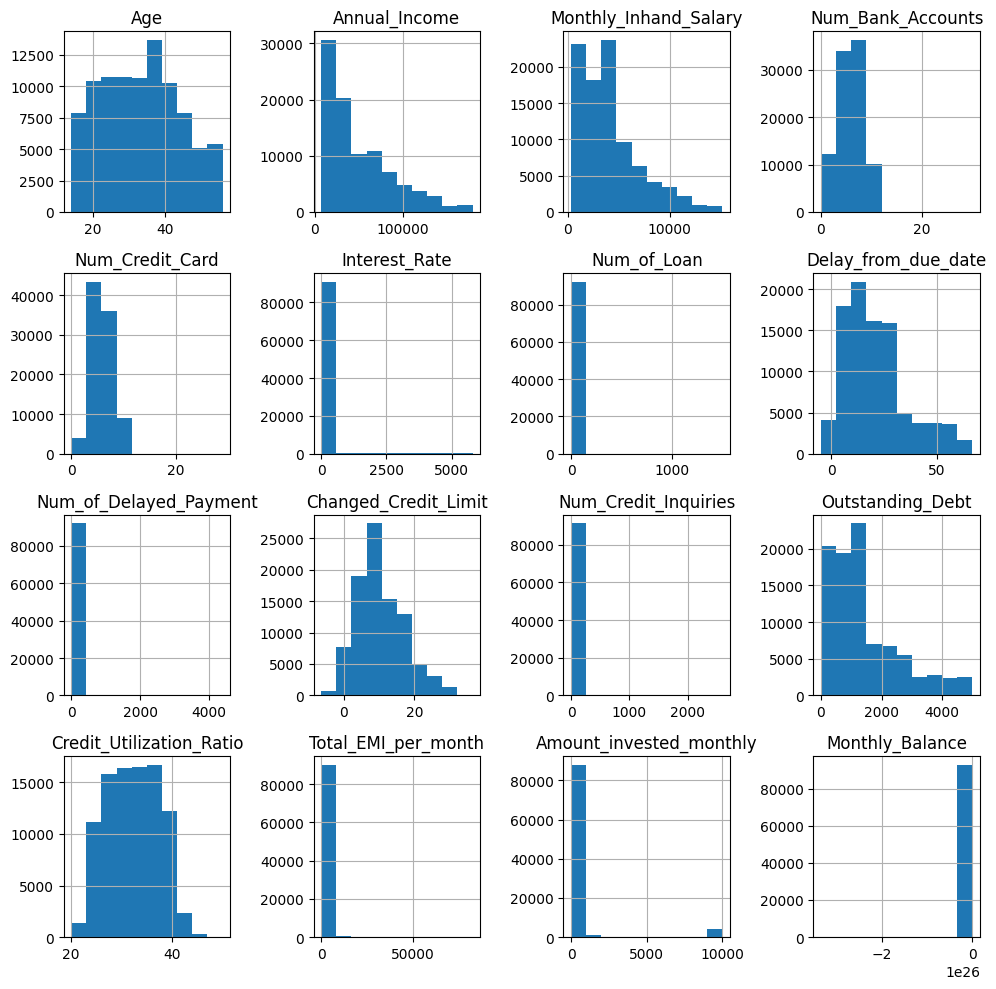

In [157]:
dataframe.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

**Right-Skewed (Positively Skewed):**
1. Annual Income: Most people have lower annual incomes.
2. Num_Bank_Accounts: Majority have fewer bank accounts.
3. Num_of_Loan: Most individuals have fewer loans.
4. Delay_from_due_date: Payments are made closer to the due date.
5. Num_of_Delayed_Payment: Most people have fewer delayed payments.
6. Changed_Credit_Limit: Two distinct groups with different credit limit changes.
7. Total_EMI_per_month: Many individuals pay smaller total EMIs per month.
8. Amount_invested_monthly: More individuals invest smaller amounts monthly.

**Left-Skewed (Negatively Skewed):**
1. Interest_Rate: More people associated with higher interest rates.
2. Credit_Utilization_Ratio: More individuals have higher credit utilization ratios.
3. Monthly_Balance: Larger number of individuals maintain higher monthly balances.

**Not Skewed (Symmetrical):**
1. Monthly Inhand Salary: Bimodal distribution with two distinct salary groups.

# computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

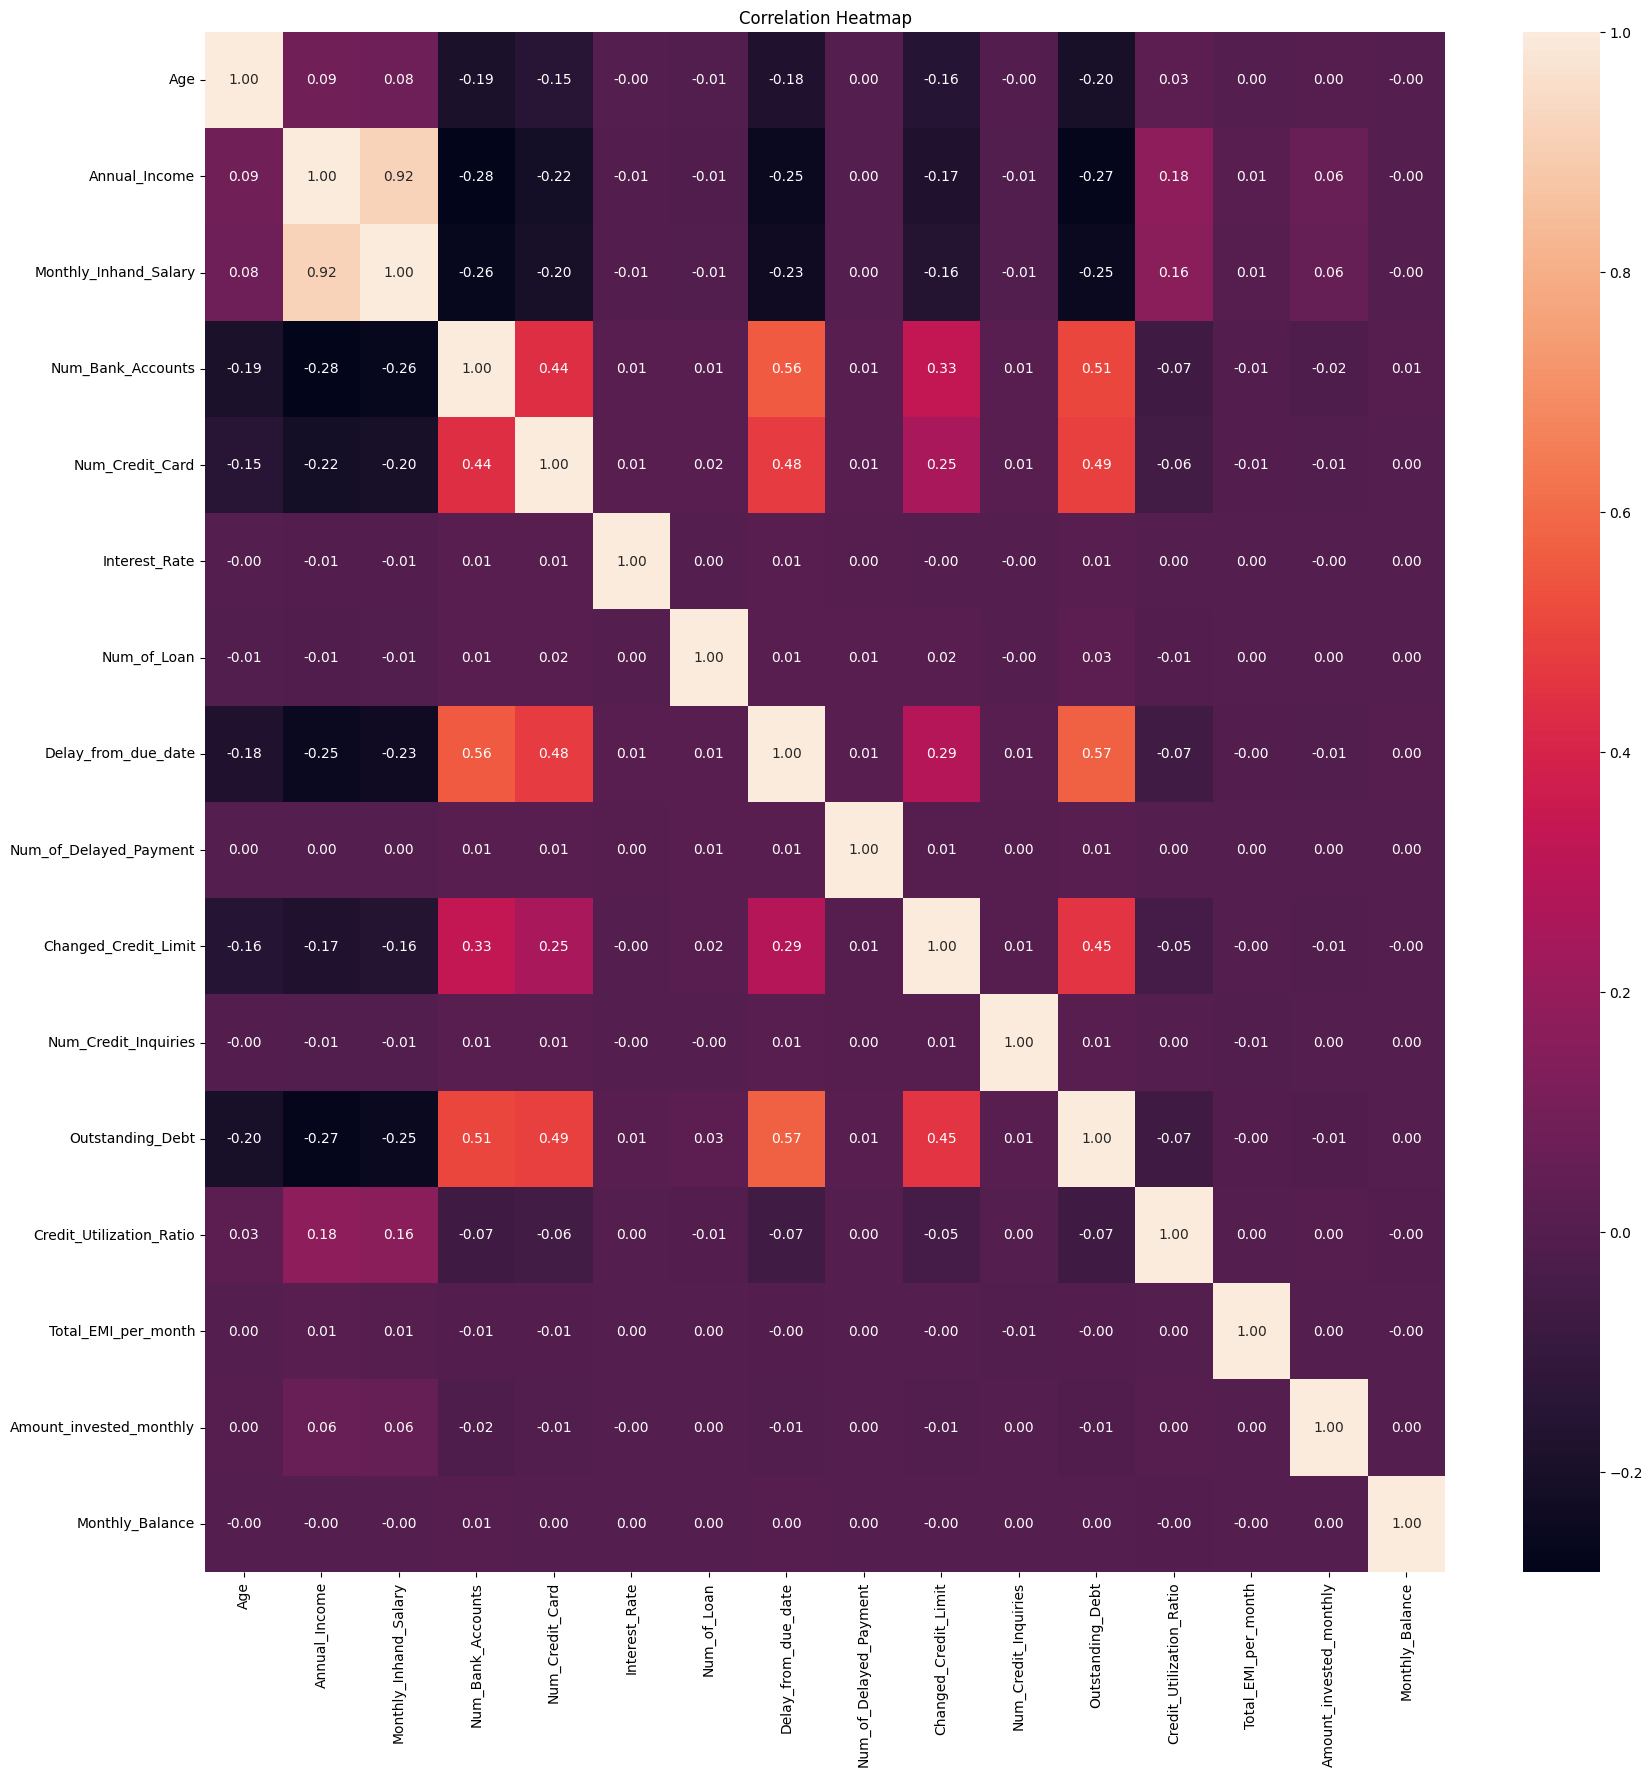

In [158]:
plt.figure(figsize=(20, 20))
correlation = dataframe[numeric_columns].corr()
sns.heatmap(correlation, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**From the above histograms we can observe that Annual_Income and Monthly_Inhand_salary are highly coreelated, which is not good for our mode, So I will be dropping Monthly_Inhand_salary as it has less relevance when compared to annual Income for a credit score classifier.
We can observe that the following columns have a high corellation. 'Num_Bank_Accounts','Num_Credit_Card','Delay_from_due_date','Outstanding_Debt','Changed_Credit_Limit'.
There are two attributes that have a negative corelation too.**


In [159]:
dataframe.drop(['Monthly_Inhand_Salary'],axis=1,inplace=True)
dataframe.columns

Index(['Customer_ID', 'Age', 'Occupation', 'Annual_Income',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [160]:
dataframe.drop(['Customer_ID'],axis=1,inplace=True)
dataframe.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

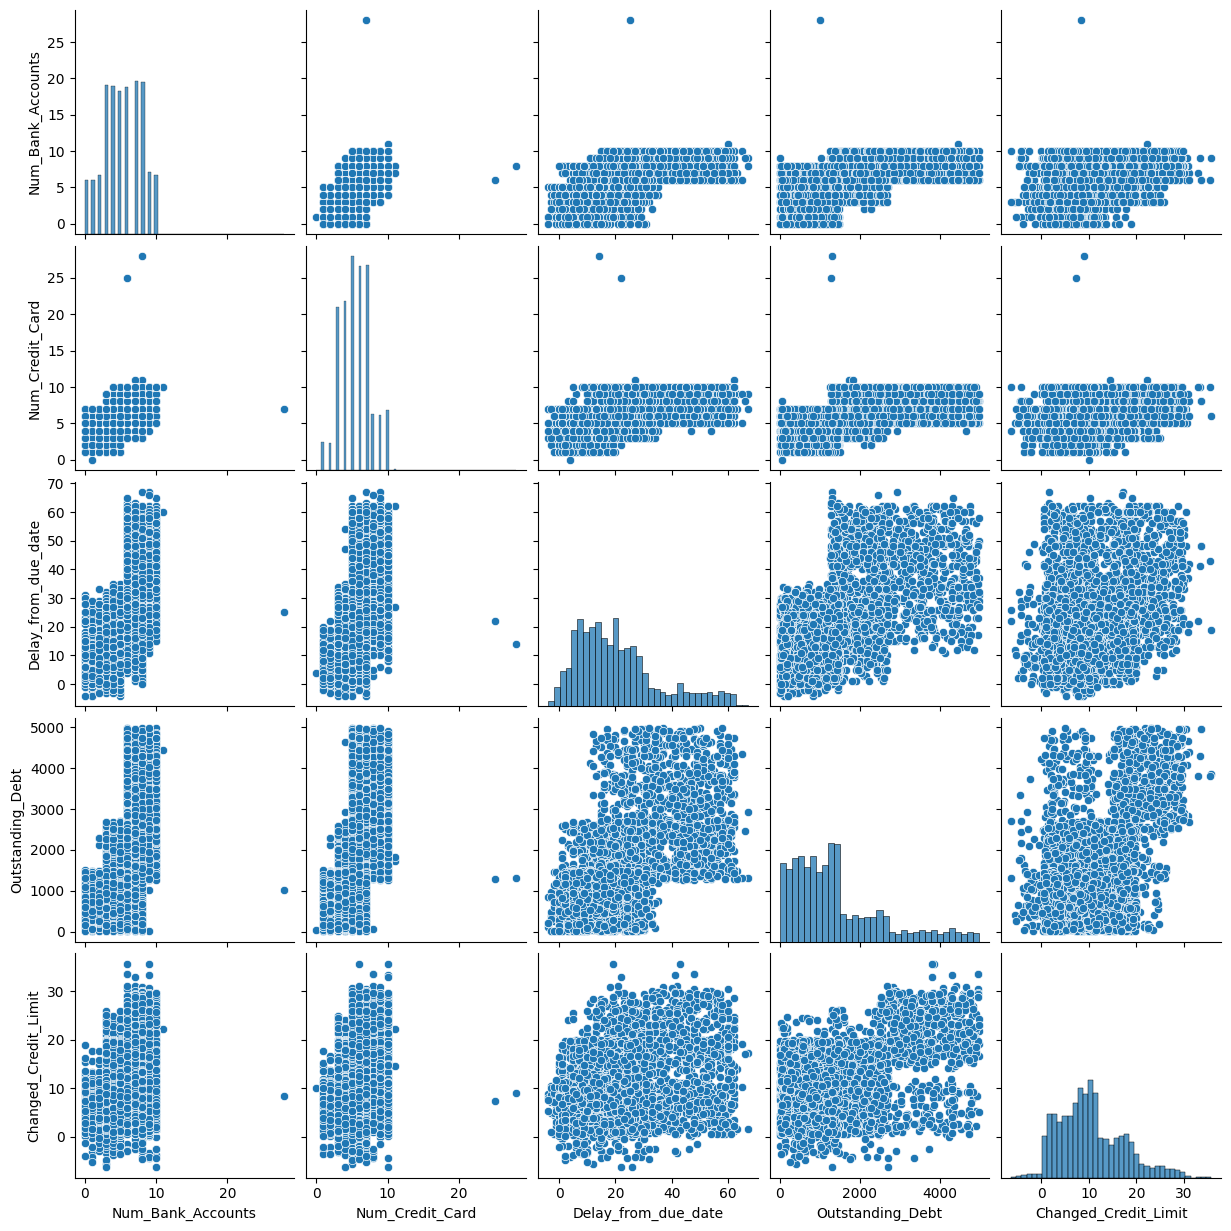

In [161]:
sampled_dataset = dataframe.sample(n=5000, random_state=42)
sns.pairplot(sampled_dataset[['Num_Bank_Accounts','Num_Credit_Card','Delay_from_due_date','Outstanding_Debt','Changed_Credit_Limit']])
plt.show()

**From the scatter plot above we can see that outstanding debt, delay from duedate,changed credit limit are having a linear corelation.**

In [162]:
# for col in categorical_columns:
#     dataframe[col] = LabelEncoder().fit_transform(dataframe[col])
# Find pairs of features with correlation greater than 0.7 (either positive or negative)
mask = (correlation > 0.4) | (correlation < -0.4)
mask = mask.where(np.triu(np.ones(mask.shape), k=1).astype(bool))
high_correlation = correlation[mask].stack().reset_index()
high_correlation = high_correlation.rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'})
high_correlation = high_correlation[high_correlation['Correlation'] != 1.0]  # Exclude self-correlations

# Display the table
print("Pairs of features with correlation greater than 0.4 (either positive or negative):")
print(high_correlation)

Pairs of features with correlation greater than 0.4 (either positive or negative):
              Feature 1              Feature 2  Correlation
0         Annual_Income  Monthly_Inhand_Salary     0.919509
1     Num_Bank_Accounts        Num_Credit_Card     0.437907
2     Num_Bank_Accounts    Delay_from_due_date     0.558176
3     Num_Bank_Accounts       Outstanding_Debt     0.506100
4       Num_Credit_Card    Delay_from_due_date     0.475829
5       Num_Credit_Card       Outstanding_Debt     0.486848
6   Delay_from_due_date       Outstanding_Debt     0.572557
7  Changed_Credit_Limit       Outstanding_Debt     0.454808


There are few features that have a slightly high correlation, although it is not significant. We'll try to scale the values and check once.

In [163]:
categorical_columns

Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Payment_Behaviour'],
      dtype='object')

In [164]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_columns:
    dataframe[col] = LabelEncoder().fit_transform(dataframe[col])
dataframe[categorical_columns]

,Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour
0,12,128,3,180,1,3
1,12,128,1,86,1,4
2,12,128,1,184,1,5
3,12,128,1,185,1,6
4,12,128,1,186,1,2
...,...,...,...,...,...,...
92692,9,683,3,307,1,1
92693,9,683,3,308,1,2
92694,9,683,1,309,1,1
92695,9,683,1,310,1,4


** sing the trainnig size of 50% and test and validation for the rest 50%**

In [165]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(dataframe, test_size=0.5, random_state=42,shuffle=True)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42,shuffle=True)
print("Shape of Train_df:", train_df.shape)
print("Shape of Val_df:", val_df.shape)
print("Shape of Test_df:", test_df.shape)

Shape of Train_df: (46344, 22)
Shape of Val_df: (23172, 22)
Shape of Test_df: (23173, 22)


In [166]:
X_train = train_df[['Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age']]
y_train = train_df['Credit_Score']

X_val = val_df[['Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age']]
y_val = val_df['Credit_Score']

X_test = test_df[['Annual_Income', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan','Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt','Credit_Utilization_Ratio', 'Credit_History_Age']]
y_test = test_df['Credit_Score']

# Display the shapes of the datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (46344, 14)
Shape of y_train: (46344,)
Shape of X_val: (23172, 14)
Shape of y_val: (23172,)
Shape of X_test: (23173, 14)
Shape of y_test: (23173,)


In [167]:
# Verify the proportions
train_proportion = len(X_train) / len(dataframe)
val_proportion = len(X_val) / len(dataframe)
test_proportion = len(X_test) / len(dataframe)

train_proportion, val_proportion, test_proportion

(0.49999460561663195, 0.24999730280831597, 0.25000809157505205)

In [168]:
# Check the distribution of the target labels in each set
label_distribution = pd.DataFrame({
    'Overall': dataframe['Credit_Score'].value_counts(normalize=True),
    'Training': y_train.value_counts(normalize=True),
    'Validation': y_val.value_counts(normalize=True),
    'Testing': y_test.value_counts(normalize=True)
})

label_distribution

,Overall,Training,Validation,Testing
Credit_Score,,,,
Standard,0.532199,0.533273,0.530079,0.532171
Poor,0.290196,0.290480,0.290480,0.289345
Good,0.177605,0.176247,0.179441,0.178484


# A. Logistic Regression

In [169]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.008, 0.05, 0.4, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [10,20,30,50,100]
}

# Assuming X_train and y_train are already defined
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', random_state=42), param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_classifier_lr = grid_search.best_estimator_
best_hyperparameters_lr = grid_search.best_params_
y_train_pred_lr = best_classifier_lr.predict(X_train)
y_val_pred_lr = best_classifier_lr.predict(X_val)
y_test_pred_lr = best_classifier_lr.predict(X_test)

print("Best Hyperparameters:", best_hyperparameters_lr)  # Best Hyperparameters

Best Hyperparameters: {'C': 100, 'max_iter': 100, 'solver': 'newton-cg'}


In [170]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classifier(y_true, y_pred, label):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"{label} Accuracy: {accuracy:.4f}")
    print(f"{label} Precision: {precision:.4f}")
    print(f"{label} Recall: {recall:.4f}")
    print(f"{label} F1 Score: {f1:.4f}")

# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_train, y_train_pred_lr, "Training")

Training Accuracy: 0.6093
Training Precision: 0.6082
Training Recall: 0.6093
Training F1 Score: 0.5908


In [171]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_val, y_val_pred_lr, "Validation")

Validation Accuracy: 0.6134
Validation Precision: 0.6149
Validation Recall: 0.6134
Validation F1 Score: 0.5935


In [172]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_test, y_test_pred_lr, "Test")

Test Accuracy: 0.6140
Test Precision: 0.6138
Test Recall: 0.6140
Test F1 Score: 0.5951


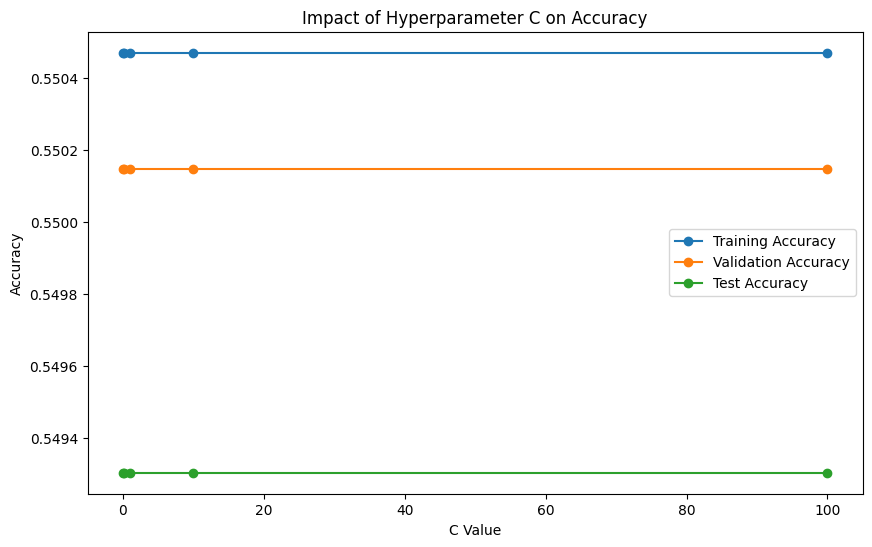

In [173]:
# Define the range of C values you want to visualize
C_values = [0.01, 0.1, 1, 10, 100]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for c in C_values:
    lr_model = LogisticRegression(multi_class='multinomial', C=c, solver='newton-cg', max_iter=10, random_state=42)
    lr_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = lr_model.predict(X_train)
    y_val_pred = lr_model.predict(X_val)
    y_test_pred = lr_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(C_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter C on Accuracy')
plt.legend()
plt.show()

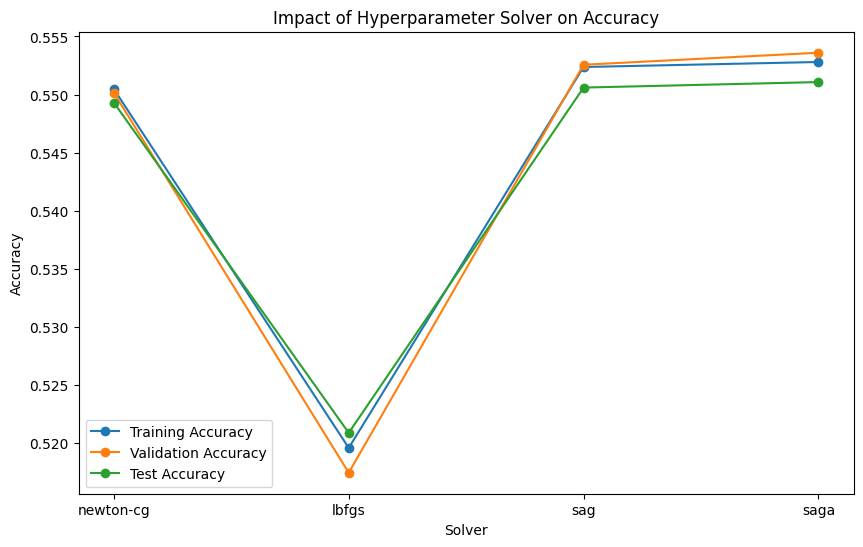

In [174]:
solver_values = ['newton-cg', 'lbfgs', 'sag', 'saga']
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for s in solver_values:
    lr_model = LogisticRegression(multi_class='multinomial', C=10, solver=s, max_iter=10, random_state=42)
    lr_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = lr_model.predict(X_train)
    y_val_pred = lr_model.predict(X_val)
    y_test_pred = lr_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solver_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(solver_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(solver_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Solver on Accuracy')
plt.legend()
plt.show()

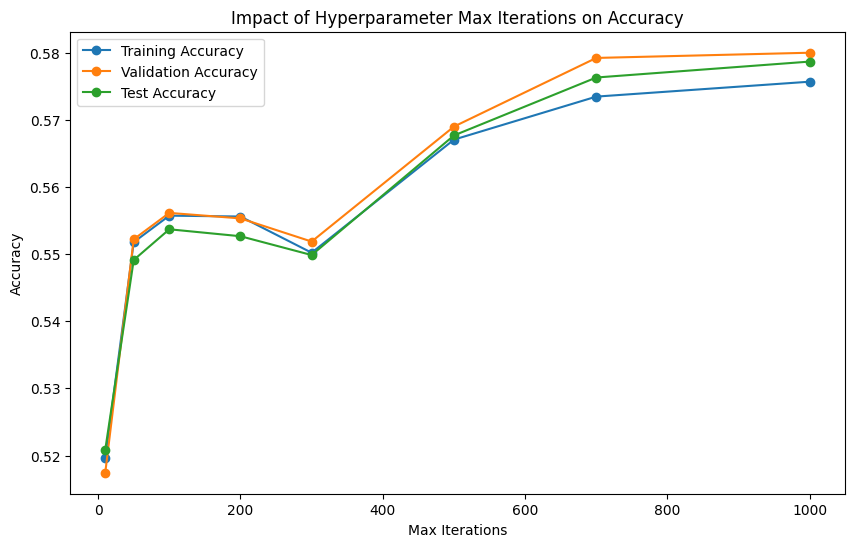

In [175]:
# impact of max_iter on accuracy
# Define the range of C values you want to visualize
max_iter_values = [10, 50, 100, 200, 300, 500, 700, 1000]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different C values
for m in max_iter_values:
    lr_model = LogisticRegression(multi_class='multinomial', C=10, solver='lbfgs', max_iter=m, random_state=42)
    lr_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = lr_model.predict(X_train)
    y_val_pred = lr_model.predict(X_val)
    y_test_pred = lr_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(max_iter_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(max_iter_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Max Iterations on Accuracy')
plt.legend()
plt.show()

# Random Forest Classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [5, 10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

RF_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
RF_grid_search.fit(X_train, y_train)

best_classifier_rf = RF_grid_search.best_estimator_
best_hyperparameters_rf = RF_grid_search.best_params_
y_train_pred_rf = best_classifier_rf.predict(X_train)
y_val_pred_rf = best_classifier_rf.predict(X_val)
y_test_pred_rf = best_classifier_rf.predict(X_test)

print("Best Hyperparameters:", best_hyperparameters_rf)  # Best Hyperparameters

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [178]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_train, y_train_pred_rf, "Training")

Training Accuracy: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Training F1 Score: 1.0000


In [179]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_val, y_val_pred_rf, "Validation")

Validation Accuracy: 0.7722
Validation Precision: 0.7714
Validation Recall: 0.7722
Validation F1 Score: 0.7716


In [180]:
# Evaluate the classifier on the training, validation, and test sets
evaluate_classifier(y_test, y_test_pred_rf, "Test")

Test Accuracy: 0.7715
Test Precision: 0.7708
Test Recall: 0.7715
Test F1 Score: 0.7709


Text(0.5, 1.0, 'Feature Importances')

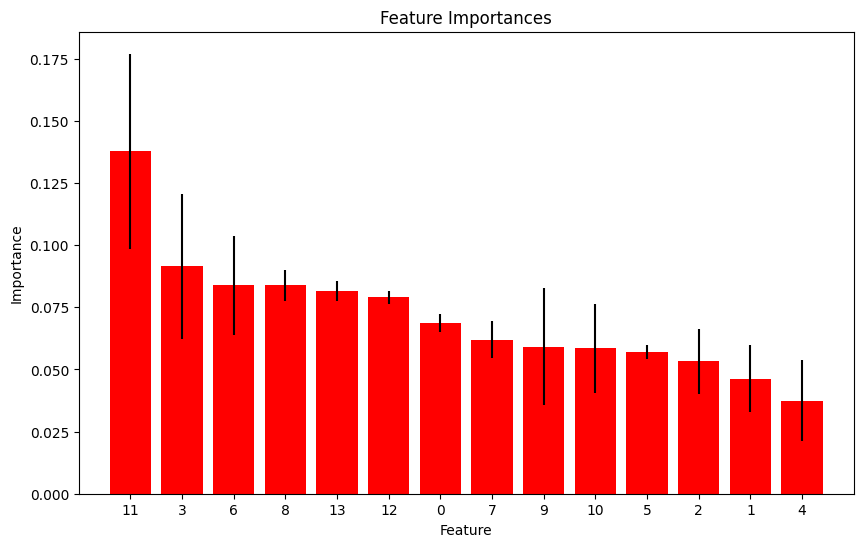

In [181]:
#Feature Importance
# Get feature importances
importances = best_classifier_rf.feature_importances_
# Get the standard deviation of feature importances
std = np.std([tree.feature_importances_ for tree in best_classifier_rf.estimators_], axis=0)
# Get the indices of the features sorted by importance
indices = np.argsort(importances)[::-1]
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')


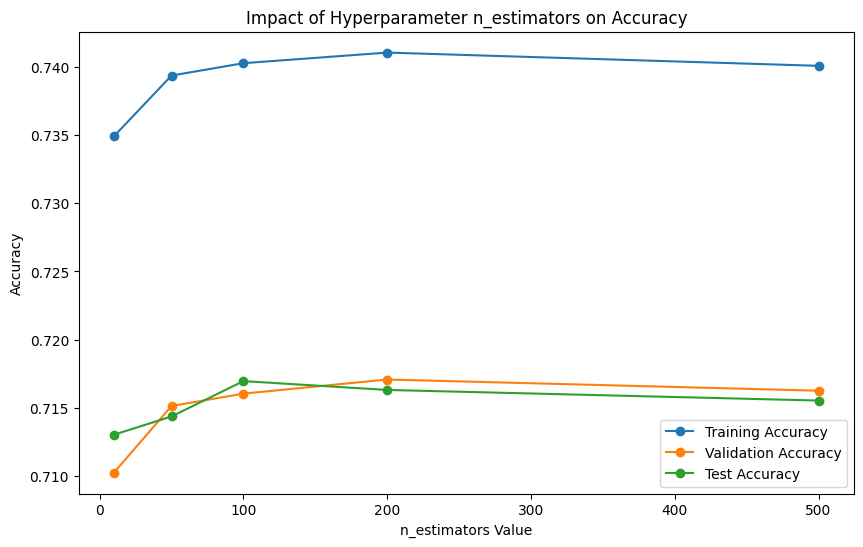

In [182]:
# Define the range of n_estimators values you want to visualize
n_estimators_values = [10, 50, 100, 200, 500]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different n_estimators values
for n in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n, max_depth=10, min_samples_split=4, min_samples_leaf=1, random_state=42)
    rf_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(n_estimators_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(n_estimators_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('n_estimators Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter n_estimators on Accuracy')
plt.legend()

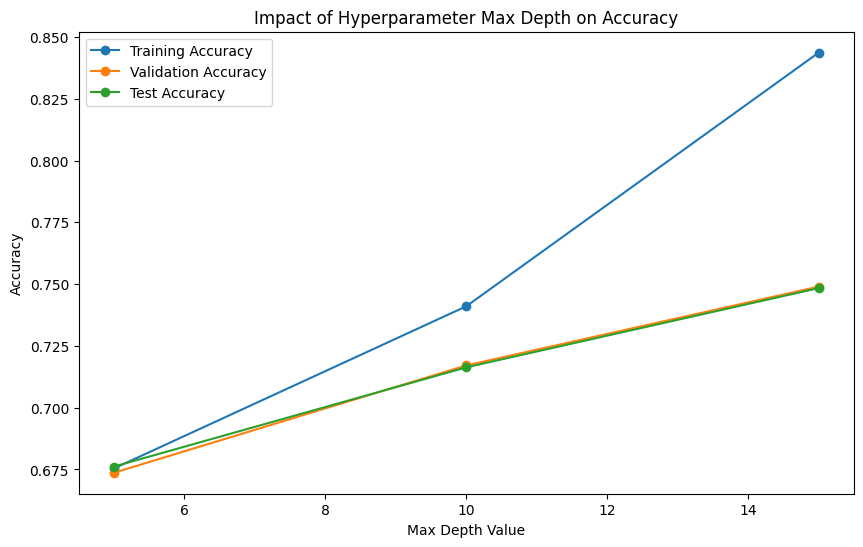

In [183]:
# Define the range of max_depth values you want to visualize
max_depth_values = [None, 5, 10, 15]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different max_depth values
for m in max_depth_values:
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=m, min_samples_split=4, min_samples_leaf=1, random_state=42)
    rf_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(max_depth_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(max_depth_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('Max Depth Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Max Depth on Accuracy')
plt.legend()

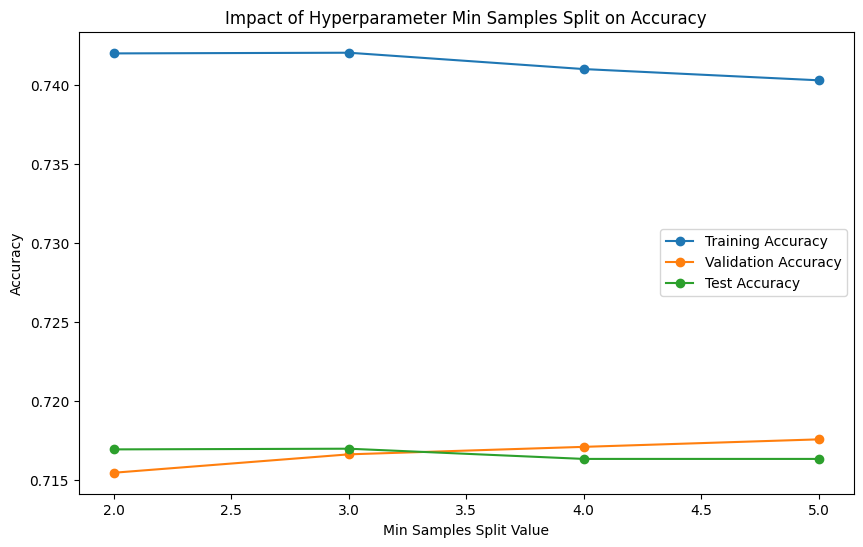

In [184]:
# Define the range of min_samples_split values you want to visualize
min_samples_split_values = [2, 3, 4, 5]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different min_samples_split values
for m in min_samples_split_values:
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=m, min_samples_leaf=1, random_state=42)
    rf_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(min_samples_split_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(min_samples_split_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('Min Samples Split Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Min Samples Split on Accuracy')
plt.legend()

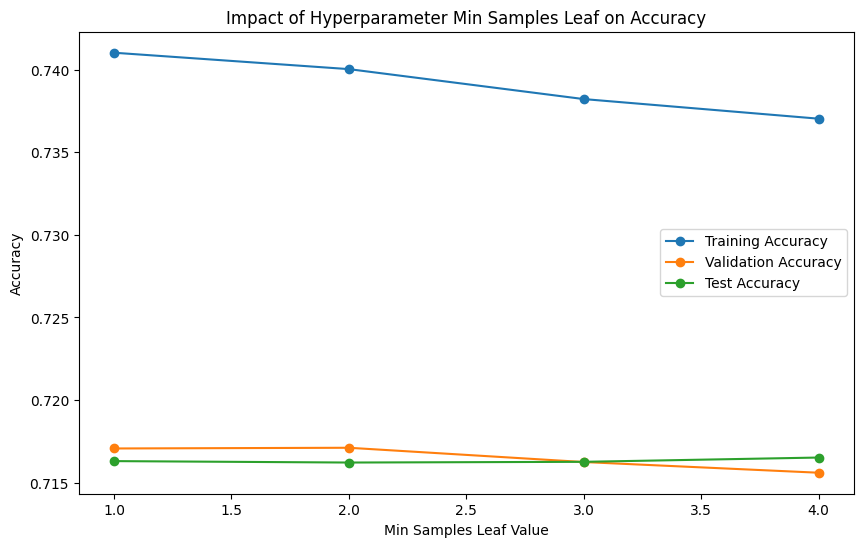

In [185]:
# Define the range of min_samples_leaf values you want to visualize
min_samples_leaf_values = [1, 2, 3, 4]
# Initialize empty lists to store performance metrics
train_accuracies = []
val_accuracies = []
test_accuracies = []
# Loop through different min_samples_leaf values
for m in min_samples_leaf_values:
    rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=4, min_samples_leaf=m, random_state=42)
    rf_model.fit(X_train, y_train)
    # Predict on different sets
    y_train_pred = rf_model.predict(X_train)
    y_val_pred = rf_model.predict(X_val)
    y_test_pred = rf_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    test_accuracies.append(test_accuracy)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, train_accuracies, label='Training Accuracy', marker = 'o')
plt.plot(min_samples_leaf_values, val_accuracies, label='Validation Accuracy', marker = 'o')
plt.plot(min_samples_leaf_values, test_accuracies, label='Test Accuracy', marker = 'o')
plt.xlabel('Min Samples Leaf Value')
plt.ylabel('Accuracy')
plt.title('Impact of Hyperparameter Min Samples Leaf on Accuracy')
plt.legend()

# Combining classifiers into an ensemble to try to outperform each individual classifier on the validation set. 

In [186]:
# Combine the classifiers into an ensemble
from sklearn.ensemble import VotingClassifier

# Initialize the classifiers with the best hyperparameters
log_reg_best = LogisticRegression(**best_hyperparameters_lr, multi_class='multinomial', random_state=42)
rf_best = RandomForestClassifier(**best_hyperparameters_rf, random_state=42, n_jobs=1)

# Create an ensemble of the classifiers using soft voting
ensemble = VotingClassifier(estimators=[
    ('lr', log_reg_best),
    ('rf', rf_best)
], voting='hard')

# Train the ensemble on the training set
ensemble.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=100,
                                                 multi_class='multinomial',
                                                 random_state=42,
                                                 solver='newton-cg')),
                             ('rf',
                              RandomForestClassifier(n_estimators=200, n_jobs=1,
                                                     random_state=42))])

In [187]:
# Predict on test set
y_test_pred = ensemble.predict(X_test)
# Calculate performance metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
# Print the performance metrics
print(f"Test accuracy: {test_accuracy}")
print(f"Test precision: {test_precision}")
print(f"Test recall: {test_recall}")
print(f"Test f1: {test_f1}")

Test accuracy: 0.7346049281491391
Test precision: 0.743570620138197
Test recall: 0.7346049281491391
Test f1: 0.7354827661786101
